### PROBLEM STATEMENT
**• DOMAIN:** Automotive. Surveillance.<br/>
**• CONTEXT:**<br/>
Computer vision can be used to automate supervision and generate action appropriate action trigger if the event is
predicted from the image of interest. For example a car moving on the road can be easily identified by a camera as make of
the car, type, colour, number plates etc.<br/>
**• DATA DESCRIPTION:**<br/>
The Cars dataset contains 16,185 images of 196 classes of cars. The data is split into 8,144 training images and 8,041 testing
images, where each class has been split roughly in a 50-50 split. Classes are typically at the level of Make, Model, Year, e.g.
2012 Tesla Model S or 2012 BMW M3 coupe.<br/>
**Data description:**
‣ Train Images: Consists of real images of cars as per the make and year of the car.<br/>
‣ Test Images: Consists of real images of cars as per the make and year of the car.<br/>
‣ Train Annotation: Consists of bounding box region for training images.<br/>
‣ Test Annotation: Consists of bounding box region for testing images.<br/>

#### Milestone 1:

**Step 1: Import the data**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

### Loading train and test annotation csv files

In [2]:
train_anno_df=pd.read_csv('./drive-download-20210512T142103Z-001/Annotations/Train Annotations.csv')
test_anno_df=pd.read_csv('./drive-download-20210512T142103Z-001/Annotations/Test Annotation.csv')

In [3]:
train_anno_df.rename(columns={'Bounding Box coordinates': 'x0', 'Unnamed: 2': 'y0','Unnamed: 3': 'x1','Unnamed: 4': 'y1'}, inplace=True)
train_anno_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8144 entries, 0 to 8143
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Image Name   8144 non-null   object
 1   x0           8144 non-null   int64 
 2   y0           8144 non-null   int64 
 3   x1           8144 non-null   int64 
 4   y1           8144 non-null   int64 
 5   Image class  8144 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 381.9+ KB


In [4]:
train_anno_df.head(10)

,Image Name,x0,y0,x1,y1,Image class
0,00001.jpg,39,116,569,375,14
1,00002.jpg,36,116,868,587,3
2,00003.jpg,85,109,601,381,91
3,00004.jpg,621,393,1484,1096,134
4,00005.jpg,14,36,133,99,106
5,00006.jpg,259,289,515,416,123
6,00007.jpg,88,80,541,397,89
7,00008.jpg,73,79,591,410,96
8,00009.jpg,20,126,1269,771,167
9,00010.jpg,21,110,623,367,58


In [5]:
test_anno_df.rename(columns={'Bounding Box coordinates': 'x0', 'Unnamed: 2': 'y0','Unnamed: 3': 'x1','Unnamed: 4': 'y1'}, inplace=True)
test_anno_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8041 entries, 0 to 8040
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Image Name   8041 non-null   object
 1   x0           8041 non-null   int64 
 2   y0           8041 non-null   int64 
 3   x1           8041 non-null   int64 
 4   y1           8041 non-null   int64 
 5   Image class  8041 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 377.0+ KB


In [6]:
test_anno_df.head(10)

,Image Name,x0,y0,x1,y1,Image class
0,00001.jpg,30,52,246,147,181
1,00002.jpg,100,19,576,203,103
2,00003.jpg,51,105,968,659,145
3,00004.jpg,67,84,581,407,187
4,00005.jpg,140,151,593,339,185
5,00006.jpg,20,77,420,301,78
6,00007.jpg,249,166,2324,1459,118
7,00008.jpg,119,215,1153,719,165
8,00009.jpg,1,7,275,183,32
9,00010.jpg,28,55,241,177,60


### Step 2: Map training and testing images to its classes.

In [7]:
#Loading name of cars 
carNameDF= pd.read_csv("./drive-download-20210512T142103Z-001/Car names and make.csv",header=None)

In [8]:
carNameDF.head(10)

,0
0,AM General Hummer SUV 2000
1,Acura RL Sedan 2012
2,Acura TL Sedan 2012
3,Acura TL Type-S 2008
4,Acura TSX Sedan 2012
5,Acura Integra Type R 2001
6,Acura ZDX Hatchback 2012
7,Aston Martin V8 Vantage Convertible 2012
8,Aston Martin V8 Vantage Coupe 2012
9,Aston Martin Virage Convertible 2012


In [9]:
carNameDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       196 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


#### Function to create data frame with Image Name, Image np array, Car Make

In [10]:
IMAGE_WIDTH=224
IMAGE_HEIGHT=224
CHANNEL=3

In [11]:
import tensorflow
tensorflow.__version__

'2.4.1'

In [12]:
import os
from tensorflow.keras.preprocessing import image
from PIL import Image

def createImageDF(imageSourceFolder,target_size_tuple,colormode,totalImagePerClassCap):
    dfRows=[]
    
    for dirname, _, filenames in os.walk(imageSourceFolder):
            print(dirname)
            limit=0
            if len(filenames) < totalImagePerClassCap:
                limit=len(filenames)
            else:
                limit=totalImagePerClassCap
            for i in range(0,limit):
                    processedRows=[]
                    filename=filenames[i]
                    processedRows.append(filename)
                    pathSplits=dirname.split('/')
                    print(os.path.join(dirname, filename))
                    imgPath=os.path.join(dirname, filename)
                    print(imgPath)
                    img = image.load_img(imgPath)
                    if target_size_tuple!='':
                        img_scaled = image.load_img(imgPath, target_size=target_size_tuple, color_mode = colormode)
                        image_width_scale_fact=target_size_tuple[0]/img.width
                        image_height_scale_fact=target_size_tuple[1]/img.height
                        imgArray = image.img_to_array(img_scaled)
                    else:
                        img
                        image_width_scale_fact=img.width
                        image_height_scale_fact=img.height
                        #img = Image.open(imgPath)
                        imgArray = image.img_to_array(img)
                    #imgArray=np.asarray(img)
                    processedRows.append(imgArray)
                    processedRows.append(pathSplits[len(pathSplits)-1])
                    processedRows.append(image_width_scale_fact)
                    processedRows.append(image_height_scale_fact)
                    dfRows.append(processedRows)
    return pd.DataFrame(dfRows, columns=["Image Name","image_array","model","image_width_scale_fact","image_height_scale_fact"])


In [13]:
trainImageDF=createImageDF('./drive-download-20210512T142103Z-001/Car Images/Train Images','',"CMYK",2)

./drive-download-20210512T142103Z-001/Car Images/Train Images
./drive-download-20210512T142103Z-001/Car Images/Train Images/Dodge Dakota Crew Cab 2010
./drive-download-20210512T142103Z-001/Car Images/Train Images/Dodge Dakota Crew Cab 2010/06796.jpg
./drive-download-20210512T142103Z-001/Car Images/Train Images/Dodge Dakota Crew Cab 2010/06796.jpg
./drive-download-20210512T142103Z-001/Car Images/Train Images/Dodge Dakota Crew Cab 2010/04157.jpg
./drive-download-20210512T142103Z-001/Car Images/Train Images/Dodge Dakota Crew Cab 2010/04157.jpg
./drive-download-20210512T142103Z-001/Car Images/Train Images/GMC Canyon Extended Cab 2012
./drive-download-20210512T142103Z-001/Car Images/Train Images/GMC Canyon Extended Cab 2012/05704.jpg
./drive-download-20210512T142103Z-001/Car Images/Train Images/GMC Canyon Extended Cab 2012/05704.jpg
./drive-download-20210512T142103Z-001/Car Images/Train Images/GMC Canyon Extended Cab 2012/01172.jpg
./drive-download-20210512T142103Z-001/Car Images/Train Imag

In [14]:
trainImageDF.head(10)

,Image Name,image_array,model,image_width_scale_fact,image_height_scale_fact
0,06796.jpg,"[[[249.0, 255.0, 241.0], [250.0, 255.0, 249.0]...",Dodge Dakota Crew Cab 2010,416,312
1,04157.jpg,"[[[8.0, 7.0, 2.0], [33.0, 32.0, 27.0], [32.0, ...",Dodge Dakota Crew Cab 2010,259,194
2,05704.jpg,"[[[77.0, 79.0, 78.0], [43.0, 45.0, 44.0], [96....",GMC Canyon Extended Cab 2012,259,194
3,01172.jpg,"[[[192.0, 213.0, 240.0], [192.0, 213.0, 240.0]...",GMC Canyon Extended Cab 2012,480,360
4,02136.jpg,"[[[247.0, 249.0, 248.0], [247.0, 249.0, 248.0]...",Hyundai Santa Fe SUV 2012,600,338
5,07662.jpg,"[[[60.0, 75.0, 118.0], [60.0, 75.0, 118.0], [5...",Hyundai Santa Fe SUV 2012,1024,768
6,05103.jpg,"[[[60.0, 54.0, 56.0], [60.0, 54.0, 56.0], [61....",Dodge Durango SUV 2012,640,425
7,03228.jpg,"[[[207.0, 198.0, 189.0], [207.0, 198.0, 189.0]...",Dodge Durango SUV 2012,625,468
8,07852.jpg,"[[[100.0, 100.0, 100.0], [100.0, 100.0, 100.0]...",Chevrolet Silverado 1500 Extended Cab 2012,960,720
9,04234.jpg,"[[[210.0, 210.0, 210.0], [210.0, 210.0, 210.0]...",Chevrolet Silverado 1500 Extended Cab 2012,480,360


In [15]:
# Lodaing annotation details for images from train_anno_df i.e. train annotations
trainMergedImageDF=pd.merge(trainImageDF,train_anno_df, on=['Image Name'])

In [16]:
trainMergedImageDF.head(10)

,Image Name,image_array,model,image_width_scale_fact,image_height_scale_fact,x0,y0,x1,y1,Image class
0,06796.jpg,"[[[249.0, 255.0, 241.0], [250.0, 255.0, 249.0]...",Dodge Dakota Crew Cab 2010,416,312,57,88,361,293,90
1,04157.jpg,"[[[8.0, 7.0, 2.0], [33.0, 32.0, 27.0], [32.0, ...",Dodge Dakota Crew Cab 2010,259,194,10,20,256,171,90
2,05704.jpg,"[[[77.0, 79.0, 78.0], [43.0, 45.0, 44.0], [96....",GMC Canyon Extended Cab 2012,259,194,50,33,229,144,122
3,01172.jpg,"[[[192.0, 213.0, 240.0], [192.0, 213.0, 240.0]...",GMC Canyon Extended Cab 2012,480,360,50,107,458,299,122
4,02136.jpg,"[[[247.0, 249.0, 248.0], [247.0, 249.0, 248.0]...",Hyundai Santa Fe SUV 2012,600,338,128,33,515,309,131
5,07662.jpg,"[[[60.0, 75.0, 118.0], [60.0, 75.0, 118.0], [5...",Hyundai Santa Fe SUV 2012,1024,768,20,11,1007,717,131
6,05103.jpg,"[[[60.0, 54.0, 56.0], [60.0, 54.0, 56.0], [61....",Dodge Durango SUV 2012,640,425,47,35,590,403,94
7,03228.jpg,"[[[207.0, 198.0, 189.0], [207.0, 198.0, 189.0]...",Dodge Durango SUV 2012,625,468,22,8,607,434,94
8,07852.jpg,"[[[100.0, 100.0, 100.0], [100.0, 100.0, 100.0]...",Chevrolet Silverado 1500 Extended Cab 2012,960,720,1,168,948,503,74
9,04234.jpg,"[[[210.0, 210.0, 210.0], [210.0, 210.0, 210.0]...",Chevrolet Silverado 1500 Extended Cab 2012,480,360,1,103,456,266,74


In [17]:
len(trainMergedImageDF)

392

In [18]:
def loadSingleScoringImage(imageSourcePath,target_size_tuple,colormode):
    dfRows=[]
    processedRow=[]
    imgPath=imageSourcePath
    img = image.load_img(imgPath)
    pathSplits=imgPath.split('/')
    if target_size_tuple!='':
        img_scaled = image.load_img(imgPath, target_size=target_size_tuple, color_mode = colormode)
        image_width_scale_fact=target_size_tuple[0]/img.width
        image_height_scale_fact=target_size_tuple[1]/img.height
        imgArray = image.img_to_array(img_scaled)
    else:
        img
        image_width_scale_fact=img.width
        image_height_scale_fact=img.height
        #img = Image.open(imgPath)
        imgArray = image.img_to_array(img)
    #imgArray=np.asarray(img)
    processedRow.append(pathSplits[len(pathSplits)-1])
    processedRow.append(imgArray)
    processedRow.append(pathSplits[len(pathSplits)-2])
    processedRow.append(image_width_scale_fact)
    processedRow.append(image_height_scale_fact)
    dfRows.append(processedRow)
    return pd.DataFrame(dfRows, columns=["Image Name","image_array","model","image_width_scale_fact","image_height_scale_fact"])

**Function to create bounding box on image**

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def drawBoxedImages(dataFrame,featureCol,x0,y0,x1,y1,boxlinewidth,boxedgecolor):
  fig,ax=plt.subplots(len(dataFrame))
  fig.set_size_inches(15,15)
  # Display the image
  for index, row in dataFrame.iterrows():
    data=row[featureCol]
    img = image.array_to_img(data)
    ax[index].imshow(img)
    image_height, image_width, _ = data.shape
    rect=[]
    rect.append(patches.Rectangle((row[x0], row[y0]), row[x1] - row[x0], row[y1] - row[y0], linewidth=boxlinewidth, edgecolor=boxedgecolor, facecolor='none'))
    # Add the patch to the Axes
    for l in range(0,len(rect)):
      ax[index].add_patch(rect[l])
  plt.show()

In [20]:
def drawImages(dataFrame,featureCol):
  fig,ax=plt.subplots(len(dataFrame))
  fig.set_size_inches(15,15)
  # Display the image
  for index, row in dataFrame.iterrows():
    data=row[featureCol]
    img = image.array_to_img(data)
    ax[index].imshow(img)
  plt.show()

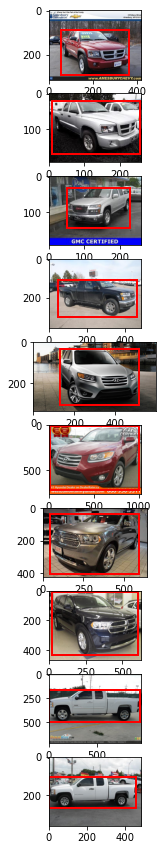

In [21]:
drawBoxedImages(trainMergedImageDF.head(10),'image_array','x0','y0','x1','y1',2,'r')

**For test data**

In [22]:
testImageDF=createImageDF('./drive-download-20210512T142103Z-001/Car Images/Test Images','',"CMYK",2)

./drive-download-20210512T142103Z-001/Car Images/Test Images
./drive-download-20210512T142103Z-001/Car Images/Test Images/Dodge Dakota Crew Cab 2010
./drive-download-20210512T142103Z-001/Car Images/Test Images/Dodge Dakota Crew Cab 2010/00318.jpg
./drive-download-20210512T142103Z-001/Car Images/Test Images/Dodge Dakota Crew Cab 2010/00318.jpg
./drive-download-20210512T142103Z-001/Car Images/Test Images/Dodge Dakota Crew Cab 2010/03773.jpg
./drive-download-20210512T142103Z-001/Car Images/Test Images/Dodge Dakota Crew Cab 2010/03773.jpg
./drive-download-20210512T142103Z-001/Car Images/Test Images/GMC Canyon Extended Cab 2012
./drive-download-20210512T142103Z-001/Car Images/Test Images/GMC Canyon Extended Cab 2012/04234.jpg
./drive-download-20210512T142103Z-001/Car Images/Test Images/GMC Canyon Extended Cab 2012/04234.jpg
./drive-download-20210512T142103Z-001/Car Images/Test Images/GMC Canyon Extended Cab 2012/05671.jpg
./drive-download-20210512T142103Z-001/Car Images/Test Images/GMC Cany

In [23]:
testImageDF.head(10)

,Image Name,image_array,model,image_width_scale_fact,image_height_scale_fact
0,00318.jpg,"[[[82.0, 57.0, 52.0], [90.0, 65.0, 60.0], [98....",Dodge Dakota Crew Cab 2010,480,360
1,03773.jpg,"[[[86.0, 116.0, 144.0], [90.0, 120.0, 148.0], ...",Dodge Dakota Crew Cab 2010,259,194
2,04234.jpg,"[[[222.0, 220.0, 207.0], [222.0, 220.0, 207.0]...",GMC Canyon Extended Cab 2012,600,399
3,05671.jpg,"[[[96.0, 149.0, 225.0], [95.0, 148.0, 224.0], ...",GMC Canyon Extended Cab 2012,625,468
4,01589.jpg,"[[[185.0, 199.0, 212.0], [184.0, 198.0, 211.0]...",Hyundai Santa Fe SUV 2012,640,480
5,01600.jpg,"[[[186.0, 210.0, 234.0], [186.0, 210.0, 234.0]...",Hyundai Santa Fe SUV 2012,1024,768
6,02057.jpg,"[[[220.0, 248.0, 252.0], [219.0, 247.0, 251.0]...",Dodge Durango SUV 2012,640,480
7,02446.jpg,"[[[172.0, 139.0, 120.0], [157.0, 124.0, 105.0]...",Dodge Durango SUV 2012,786,492
8,05880.jpg,"[[[207.0, 203.0, 202.0], [202.0, 198.0, 197.0]...",Chevrolet Silverado 1500 Extended Cab 2012,259,194
9,02686.jpg,"[[[254.0, 253.0, 251.0], [255.0, 255.0, 253.0]...",Chevrolet Silverado 1500 Extended Cab 2012,400,300


In [24]:
# Lodaing annotation details for images from train_anno_df i.e. train annotations
testMergedImageDF=pd.merge(testImageDF,test_anno_df, on=['Image Name'])

In [25]:
testMergedImageDF.head(10)

,Image Name,image_array,model,image_width_scale_fact,image_height_scale_fact,x0,y0,x1,y1,Image class
0,00318.jpg,"[[[82.0, 57.0, 52.0], [90.0, 65.0, 60.0], [98....",Dodge Dakota Crew Cab 2010,480,360,83,55,465,324,90
1,03773.jpg,"[[[86.0, 116.0, 144.0], [90.0, 120.0, 148.0], ...",Dodge Dakota Crew Cab 2010,259,194,33,43,240,168,90
2,04234.jpg,"[[[222.0, 220.0, 207.0], [222.0, 220.0, 207.0]...",GMC Canyon Extended Cab 2012,600,399,25,28,556,389,122
3,05671.jpg,"[[[96.0, 149.0, 225.0], [95.0, 148.0, 224.0], ...",GMC Canyon Extended Cab 2012,625,468,28,154,604,434,122
4,01589.jpg,"[[[185.0, 199.0, 212.0], [184.0, 198.0, 211.0]...",Hyundai Santa Fe SUV 2012,640,480,101,168,601,450,131
5,01600.jpg,"[[[186.0, 210.0, 234.0], [186.0, 210.0, 234.0]...",Hyundai Santa Fe SUV 2012,1024,768,24,43,946,744,131
6,02057.jpg,"[[[220.0, 248.0, 252.0], [219.0, 247.0, 251.0]...",Dodge Durango SUV 2012,640,480,32,48,607,440,94
7,02446.jpg,"[[[172.0, 139.0, 120.0], [157.0, 124.0, 105.0]...",Dodge Durango SUV 2012,786,492,284,193,706,457,94
8,05880.jpg,"[[[207.0, 203.0, 202.0], [202.0, 198.0, 197.0]...",Chevrolet Silverado 1500 Extended Cab 2012,259,194,5,66,255,181,74
9,02686.jpg,"[[[254.0, 253.0, 251.0], [255.0, 255.0, 253.0]...",Chevrolet Silverado 1500 Extended Cab 2012,400,300,5,100,380,221,74


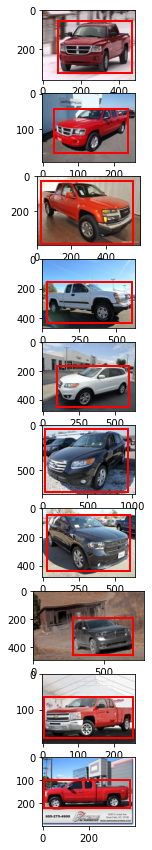

In [26]:
drawBoxedImages(testMergedImageDF.head(10),'image_array','x0','y0','x1','y1',2,'r')

### Let's check distribution of each class in our training data

<AxesSubplot:xlabel='Image class', ylabel='Count'>

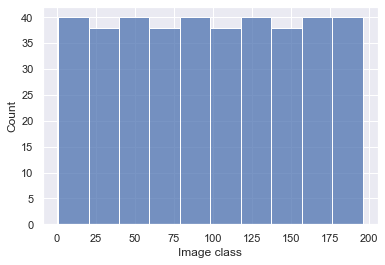

In [27]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.histplot(x= trainMergedImageDF['Image class'],bins = 10)

### From above histogram it is clear that we have almost equal density distribution among car classes in training data df

### Let's reduce size of training data set images

In [28]:
trainReducedImageDF=createImageDF('./drive-download-20210512T142103Z-001/Car Images/Train Images',(IMAGE_WIDTH,IMAGE_HEIGHT,CHANNEL),"grayscale",7)

./drive-download-20210512T142103Z-001/Car Images/Train Images
./drive-download-20210512T142103Z-001/Car Images/Train Images/Dodge Dakota Crew Cab 2010
./drive-download-20210512T142103Z-001/Car Images/Train Images/Dodge Dakota Crew Cab 2010/06796.jpg
./drive-download-20210512T142103Z-001/Car Images/Train Images/Dodge Dakota Crew Cab 2010/06796.jpg
./drive-download-20210512T142103Z-001/Car Images/Train Images/Dodge Dakota Crew Cab 2010/04157.jpg
./drive-download-20210512T142103Z-001/Car Images/Train Images/Dodge Dakota Crew Cab 2010/04157.jpg
./drive-download-20210512T142103Z-001/Car Images/Train Images/Dodge Dakota Crew Cab 2010/00682.jpg
./drive-download-20210512T142103Z-001/Car Images/Train Images/Dodge Dakota Crew Cab 2010/00682.jpg
./drive-download-20210512T142103Z-001/Car Images/Train Images/Dodge Dakota Crew Cab 2010/07660.jpg
./drive-download-20210512T142103Z-001/Car Images/Train Images/Dodge Dakota Crew Cab 2010/07660.jpg
./drive-download-20210512T142103Z-001/Car Images/Train Im

In [29]:
trainReducedImageDF.head(5)

,Image Name,image_array,model,image_width_scale_fact,image_height_scale_fact
0,06796.jpg,"[[[252.0], [253.0], [245.0], [242.0], [250.0],...",Dodge Dakota Crew Cab 2010,0.538462,0.717949
1,04157.jpg,"[[[7.0], [32.0], [31.0], [24.0], [19.0], [10.0...",Dodge Dakota Crew Cab 2010,0.864865,1.154639
2,00682.jpg,"[[[31.0], [11.0], [17.0], [25.0], [24.0], [26....",Dodge Dakota Crew Cab 2010,0.700000,0.933333
3,07660.jpg,"[[[47.0], [44.0], [44.0], [30.0], [38.0], [38....",Dodge Dakota Crew Cab 2010,0.218750,0.291667
4,00483.jpg,"[[[208.0], [208.0], [208.0], [208.0], [208.0],...",Dodge Dakota Crew Cab 2010,0.350000,0.622222


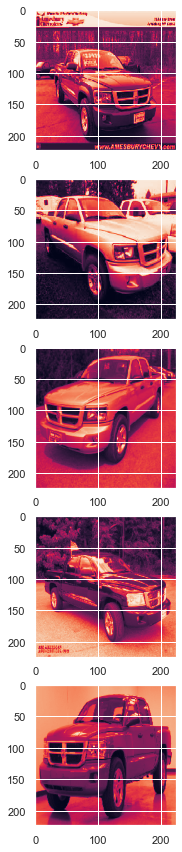

In [30]:
drawImages(trainReducedImageDF.head(5),'image_array')

In [31]:
# Lodaing annotation details for images from train_anno_df i.e. train annotations
trainReducedMergedImageDF=pd.merge(trainReducedImageDF,train_anno_df, on=['Image Name'])

In [32]:
trainReducedMergedImageDF.head()

,Image Name,image_array,model,image_width_scale_fact,image_height_scale_fact,x0,y0,x1,y1,Image class
0,06796.jpg,"[[[252.0], [253.0], [245.0], [242.0], [250.0],...",Dodge Dakota Crew Cab 2010,0.538462,0.717949,57,88,361,293,90
1,04157.jpg,"[[[7.0], [32.0], [31.0], [24.0], [19.0], [10.0...",Dodge Dakota Crew Cab 2010,0.864865,1.154639,10,20,256,171,90
2,00682.jpg,"[[[31.0], [11.0], [17.0], [25.0], [24.0], [26....",Dodge Dakota Crew Cab 2010,0.700000,0.933333,11,15,297,201,90
3,07660.jpg,"[[[47.0], [44.0], [44.0], [30.0], [38.0], [38....",Dodge Dakota Crew Cab 2010,0.218750,0.291667,68,122,980,690,90
4,00483.jpg,"[[[208.0], [208.0], [208.0], [208.0], [208.0],...",Dodge Dakota Crew Cab 2010,0.350000,0.622222,18,26,623,342,90


#### Function to create scalled bounding boxes

In [33]:
def scaledBoundingBoxCreator(df):
    df['x0_scaled']=df.x0 *df.image_width_scale_fact
    df['y0_scaled']=df.y0*df.image_height_scale_fact
    df['x1_scaled']=df.x1*df.image_width_scale_fact
    df['y1_scaled']=df.y1*df.image_height_scale_fact
    df['x0_scaled']=df['x0_scaled'].apply(np.floor)
    df['y0_scaled']=df['y0_scaled'].apply(np.floor)
    df['x1_scaled']=df['x1_scaled'].apply(np.floor)
    df['y1_scaled']=df['y1_scaled'].apply(np.floor)

In [34]:
scaledBoundingBoxCreator(trainReducedMergedImageDF)

In [35]:
trainReducedMergedImageDF.head()

,Image Name,image_array,model,image_width_scale_fact,image_height_scale_fact,x0,y0,x1,y1,Image class,x0_scaled,y0_scaled,x1_scaled,y1_scaled
0,06796.jpg,"[[[252.0], [253.0], [245.0], [242.0], [250.0],...",Dodge Dakota Crew Cab 2010,0.538462,0.717949,57,88,361,293,90,30.0,63.0,194.0,210.0
1,04157.jpg,"[[[7.0], [32.0], [31.0], [24.0], [19.0], [10.0...",Dodge Dakota Crew Cab 2010,0.864865,1.154639,10,20,256,171,90,8.0,23.0,221.0,197.0
2,00682.jpg,"[[[31.0], [11.0], [17.0], [25.0], [24.0], [26....",Dodge Dakota Crew Cab 2010,0.700000,0.933333,11,15,297,201,90,7.0,14.0,207.0,187.0
3,07660.jpg,"[[[47.0], [44.0], [44.0], [30.0], [38.0], [38....",Dodge Dakota Crew Cab 2010,0.218750,0.291667,68,122,980,690,90,14.0,35.0,214.0,201.0
4,00483.jpg,"[[[208.0], [208.0], [208.0], [208.0], [208.0],...",Dodge Dakota Crew Cab 2010,0.350000,0.622222,18,26,623,342,90,6.0,16.0,218.0,212.0


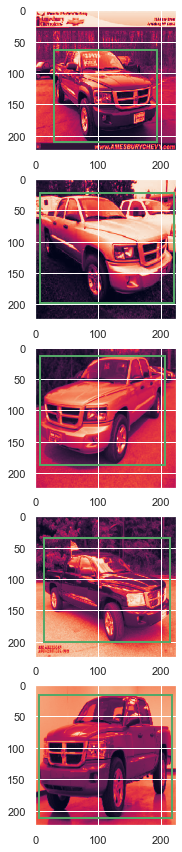

In [36]:
drawBoxedImages(trainReducedMergedImageDF.head(),'image_array','x0_scaled','y0_scaled','x1_scaled','y1_scaled',2,'g')

### Noramlizing image features as they are ranging from 0 to 255

In [37]:
trainReducedMergedImageDF['image_array']=trainReducedMergedImageDF['image_array']/255

In [38]:
trainReducedMergedImageDF.head(2)

,Image Name,image_array,model,image_width_scale_fact,image_height_scale_fact,x0,y0,x1,y1,Image class,x0_scaled,y0_scaled,x1_scaled,y1_scaled
0,06796.jpg,"[[[0.9882353], [0.99215686], [0.9607843], [0.9...",Dodge Dakota Crew Cab 2010,0.538462,0.717949,57,88,361,293,90,30.0,63.0,194.0,210.0
1,04157.jpg,"[[[0.02745098], [0.1254902], [0.12156863], [0....",Dodge Dakota Crew Cab 2010,0.864865,1.154639,10,20,256,171,90,8.0,23.0,221.0,197.0


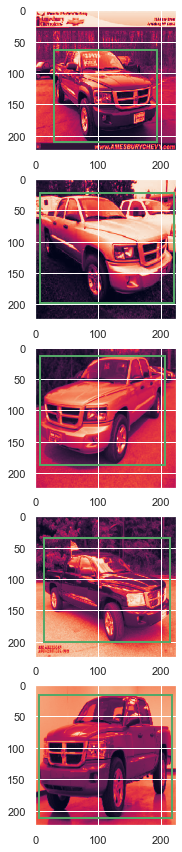

In [39]:
drawBoxedImages(trainReducedMergedImageDF.head(),'image_array','x0_scaled','y0_scaled','x1_scaled','y1_scaled',2,'g')

#### Creating reduced image size test data

In [40]:
testReducedImageDF=createImageDF('./drive-download-20210512T142103Z-001/Car Images/Test Images',(IMAGE_WIDTH,IMAGE_HEIGHT,CHANNEL),"grayscale",7)

./drive-download-20210512T142103Z-001/Car Images/Test Images
./drive-download-20210512T142103Z-001/Car Images/Test Images/Dodge Dakota Crew Cab 2010
./drive-download-20210512T142103Z-001/Car Images/Test Images/Dodge Dakota Crew Cab 2010/00318.jpg
./drive-download-20210512T142103Z-001/Car Images/Test Images/Dodge Dakota Crew Cab 2010/00318.jpg
./drive-download-20210512T142103Z-001/Car Images/Test Images/Dodge Dakota Crew Cab 2010/03773.jpg
./drive-download-20210512T142103Z-001/Car Images/Test Images/Dodge Dakota Crew Cab 2010/03773.jpg
./drive-download-20210512T142103Z-001/Car Images/Test Images/Dodge Dakota Crew Cab 2010/01206.jpg
./drive-download-20210512T142103Z-001/Car Images/Test Images/Dodge Dakota Crew Cab 2010/01206.jpg
./drive-download-20210512T142103Z-001/Car Images/Test Images/Dodge Dakota Crew Cab 2010/08018.jpg
./drive-download-20210512T142103Z-001/Car Images/Test Images/Dodge Dakota Crew Cab 2010/08018.jpg
./drive-download-20210512T142103Z-001/Car Images/Test Images/Dodge 

In [41]:
# Lodaing annotation details for images from test_anno_df i.e. test annotations
testReducedMergedImageDF=pd.merge(testReducedImageDF,test_anno_df, on=['Image Name'])

In [42]:
scaledBoundingBoxCreator(testReducedMergedImageDF)

### Noramlizing image features as they are ranging from 0 to 255

In [43]:
testReducedMergedImageDF['image_array']=testReducedMergedImageDF['image_array']/255

### Let's create X_train,y_train,x_test,y_test variables

In [44]:
testReducedMergedImageDF['image_array'].shape

(1372,)

In [45]:
# Creating an empty tensor to store image arrays
def createFeatureTensor(dfCol):
    tensor = np.zeros((dfCol.shape[0],IMAGE_WIDTH,IMAGE_HEIGHT,CHANNEL))
    # Iterating through image arrays to update tensor
    for idx, i in enumerate(dfCol):
        tensor[idx] = i
    # Checking the tensor shape
    tensor.shape
    return tensor

In [46]:
# Creating an empty tensor to store image arrays
def createBondingBoxTensor(df,x0,y0,x1,y1):
    labelBox = []
    # Iterating through image arrays to update tensor
    for i in range(0,len(df[x0])):
        params=[]
        params.append(df[x0][i])
        params.append(df[y0][i])
        params.append(df[x1][i])
        params.append(df[y1][i])
        labelBox.append(params)
    return np.array(labelBox)

In [47]:
x_train = createFeatureTensor(trainReducedMergedImageDF['image_array'])
x_test = createFeatureTensor(testReducedMergedImageDF['image_array'])

In [48]:
x_train.shape

(1372, 224, 224, 3)

### Creating lables for classification

In [49]:
y_train_classi=trainReducedMergedImageDF['Image class']
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
le=LabelEncoder()
y_train_tensor=le.fit_transform(y_train_classi)
y_train_tensor=to_categorical(y_train_tensor,196)

In [50]:
y_train_tensor.shape

(1372, 196)

In [51]:
y_test_classi=testReducedMergedImageDF['Image class']
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
le=LabelEncoder()
y_test_tensor=le.fit_transform(y_test_classi)
y_test_tensor=to_categorical(y_test_tensor,196)

In [52]:
y_train_tensor[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [53]:
y_test_tensor.shape

(1372, 196)

### Transfer learning using Pre-trained model as Feature Extractor
We use ResNet50 deep learning model as the pre-trained model for feature extraction for Transfer Learning.
- To implement Transfer learning, we will remove the last predicting layer of the pre-trained ResNet50 model and replace them with our own predicting layers.
- Weights of ResNet50 pre-trained model is used as feature extractor
- Weights of the pre-trained model are frozen and are not updated during the training
- We do not want to load the last fully connected layers which act as the classifier. We accomplish that by using “include_top=False”. We do this so that we can add our own fully connected layers on top of the ResNet50 model for our task-specific classification.
- We freeze the weights of the model by setting trainable as “False”. This stops any updates to the pre-trained weights during training We do not want to train ResNet layers as we want to leverage the knowledge learned by the deep neural network trained from the previous data set which in our case is “imagenet”

In [54]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
import tensorflow.keras
restnet = ResNet50(include_top=False, weights='imagenet', input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3))
output = restnet.layers[-1].output
output = tensorflow.keras.layers.Flatten()(output)
restnet = Model(restnet.input, output)
for layer in restnet.layers:
    layer.trainable = False
restnet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

#### We now create our model using Transfer Learning using Pre-trained ResNet50 by adding our own fully connected layer and the final classifier using softmax activation function.


In [55]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

output_nodes=196 #As range of image labels is up to 196

model = Sequential()
model.add(restnet)
model.add(Dense(512, activation='relu', input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,CHANNEL)))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(output_nodes, activation='softmax'))

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 100352)            23587712  
_________________________________________________________________
dense (Dense)                (None, 512)               51380736  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 196)               100548    
Total params: 75,331,652
Trainable params: 51,743,940
Non-trainable params: 23,587,712
___________________________________

#### We see that the weights of ResNet50 are not trainable as we had frozen them.

In [57]:
'''
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
'''

"\nmodel.compile(loss='categorical_crossentropy',\n              optimizer=optimizers.RMSprop(lr=2e-5),\n              metrics=['accuracy'])\n"

In [58]:
# history=model.fit( x=x_train, y=y_train_tensor, batch_size=32, epochs=10,shuffle=True,verbose=1,validation_split=0.2)

In [59]:
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [60]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
# history=model.fit( x=x_train, y=y_train_tensor, batch_size=32, epochs=10,shuffle=True,verbose=1,validation_split=0.2)

In [62]:
# Use earlystopping
callbacks = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)
# callbacks = tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Fit the model
iterations=100
batch_size=32
history = model.fit(x_train, y_train_tensor, batch_size = batch_size, epochs = iterations, shuffle=True, validation_data=(x_test, y_test_tensor), callbacks=[callbacks], verbose=1) 

Epoch 1/100
43/43 [==============================] - 119s 3s/step - loss: 8.6173 - accuracy: 0.0041 - val_loss: 5.2781 - val_accuracy: 0.0051
Epoch 2/100
43/43 [==============================] - 114s 3s/step - loss: 5.2887 - accuracy: 0.0045 - val_loss: 5.3487 - val_accuracy: 0.0051
Epoch 3/100
43/43 [==============================] - 113s 3s/step - loss: 5.2992 - accuracy: 0.0043 - val_loss: 5.2781 - val_accuracy: 0.0051


#### We do now unfreezing a few of the last convolution blocks while keeping the first early conv blocks frozen. This will help us to learn very generic features using early layers. Higher layers of pre-trained models will be trainable or fine-tuned.

In [66]:
restnet.trainable = True
set_trainable = False
for layer in restnet.layers:
    if layer.name in ['conv5_block3_3_conv', 'conv5_block3_2_relu', 'conv5_block3_2_conv']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
layers = [(layer, layer.name, layer.trainable) for layer in restnet.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.In...,input_1,False
1,<tensorflow.python.keras.layers.convolutional....,conv1_pad,False
2,<tensorflow.python.keras.layers.convolutional....,conv1_conv,False
3,<tensorflow.python.keras.layers.normalization_...,conv1_bn,False
4,<tensorflow.python.keras.layers.core.Activatio...,conv1_relu,False
...,...,...,...
171,<tensorflow.python.keras.layers.convolutional....,conv5_block3_3_conv,True
172,<tensorflow.python.keras.layers.normalization_...,conv5_block3_3_bn,True
173,<tensorflow.python.keras.layers.merge.Add obje...,conv5_block3_add,True
174,<tensorflow.python.keras.layers.core.Activatio...,conv5_block3_out,True


#### We see that we have set the training for early layers of ResNet50 to false and the last few layers of ResNet50 are now trainable.

#### We now add our own fully connected layer and classifier on top of the ResNet50. We have already removed the last fully connected layer and the classifier layer from ResNet50

In [67]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

output_nodes=196 #As range of image labels is up to 196
model_finetuned = Sequential()
model_finetuned.add(restnet)
model_finetuned.add(Dense(512, activation='relu', input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,CHANNEL)))
model_finetuned.add(Dropout(0.3))
model_finetuned.add(Dense(512, activation='relu'))
model_finetuned.add(Dropout(0.3))
model_finetuned.add(Dense(output_nodes, activation='softmax'))

In [68]:
model_finetuned.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 100352)            23587712  
_________________________________________________________________
dense_3 (Dense)              (None, 512)               51380736  
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 196)               100548    
Total params: 75,331,652
Trainable params: 55,159,492
Non-trainable params: 20,172,160
_________________________________

In [69]:
model_finetuned.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:
history = model_finetuned.fit(x_train, y_train_tensor, batch_size = batch_size, epochs = iterations, shuffle=True, validation_data=(x_test, y_test_tensor), callbacks=[callbacks], verbose=1)

Epoch 1/100
43/43 [==============================] - 118s 3s/step - loss: 7.9552 - accuracy: 0.0054 - val_loss: 6.3714 - val_accuracy: 0.0044
Epoch 2/100
43/43 [==============================] - 117s 3s/step - loss: 5.2786 - accuracy: 0.0000e+00 - val_loss: 5.2878 - val_accuracy: 0.0058
Epoch 3/100
43/43 [==============================] - 115s 3s/step - loss: 5.2787 - accuracy: 0.0013 - val_loss: 5.2788 - val_accuracy: 0.0036


#### Creating bounding box labels

In [71]:
y_train=createBondingBoxTensor(trainReducedMergedImageDF,'x0_scaled','y0_scaled','x1_scaled','y1_scaled')
y_test=createBondingBoxTensor(testReducedMergedImageDF,'x0_scaled','y0_scaled','x1_scaled','y1_scaled')

In [72]:
y_train.shape

(1372, 4)

In [73]:
y_test.shape

(1372, 4)

### Create the model for bounding box predictions

In [74]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Reshape

def create_model(imgWidth,imgHeight,trainable=True):
    model = ResNet50(input_shape=(imgWidth,imgHeight,CHANNEL), include_top=False, weights='imagenet') # Load pre-trained resnet50
    # Do not include classification (top) layer

    # to freeze layers, except the new top layer, of course, which will be added below
    for layer in model.layers:
        layer.trainable = trainable

    # Add new top layer which is a conv layer of the same size as the previous layer so that only 4 coords of BBox can be output
    x0 = model.layers[-1].output
    x1 = Conv2D(4, kernel_size=7, name="coords")(x0)
    x2 = Reshape((4,))(x1) # These are the 4 predicted coordinates of one BBox

    return Model(inputs=model.input, outputs=x2)

### Define evaluation metric

In [75]:
def IOU(y_true, y_pred):
    intersections = 0
    unions = 0
    # set the types so we are sure what type we are using

    gt = y_true
    pred = y_pred
    # Compute interection of predicted (pred) and ground truth (gt) bounding boxes
    diff_width = np.minimum(gt[:,0] + gt[:,2], pred[:,0] + pred[:,2]) - np.maximum(gt[:,0], pred[:,0])
    diff_height = np.minimum(gt[:,1] + gt[:,3], pred[:,1] + pred[:,3]) - np.maximum(gt[:,1], pred[:,1])
    intersection = diff_width * diff_height

    # Compute union
    area_gt = gt[:,2] * gt[:,3]
    area_pred = pred[:,2] * pred[:,3]
    union = area_gt + area_pred - intersection

    # Compute intersection and union over multiple boxes
    for j, _ in enumerate(union):
      if union[j] > 0 and intersection[j] > 0 and union[j] >= intersection[j]:
        intersections += intersection[j]
        unions += union[j]

    # Compute IOU. Use epsilon to prevent division by zero
    iou = np.round(intersections / (unions + tensorflow.keras.backend.epsilon()), 4)
    # This must match the type used in py_func
    iou = iou.astype(np.float32)
    return iou

In [76]:
def IoU(y_true, y_pred):
    iou = tensorflow.py_function(IOU, [y_true, y_pred], Tout=tensorflow.float32)
    return iou

###  Initialize the model and print summary

In [77]:
model = create_model(IMAGE_WIDTH,IMAGE_HEIGHT,False) # Arg is False, if you want to freeze lower layers for fast training (but low accuracy)
model.summary() # Print summary

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

### Compile the model
* loss: "mean_squared_error"
* metrics: IoU
* optimizer: "adam"

In [78]:
# Compile the model
model.compile(loss="mean_squared_error", optimizer="adam", metrics=[IoU]) # Regression loss is MSE

### Training the model
Fit the model to the dataset<br/>

* Use early stopping
* fit the model
* give train data - training features and labels
    ** batch size: 32
    ** epochs: 10
    ** give validation data - testing features and labels

In [79]:
x_train[0]

array([[[0.98823529, 0.98823529, 0.98823529],
        [0.99215686, 0.99215686, 0.99215686],
        [0.96078432, 0.96078432, 0.96078432],
        ...,
        [0.96470588, 0.96470588, 0.96470588],
        [0.96862745, 0.96862745, 0.96862745],
        [0.96078432, 0.96078432, 0.96078432]],

       [[0.97647059, 0.97647059, 0.97647059],
        [0.98039216, 0.98039216, 0.98039216],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.95686275, 0.95686275, 0.95686275],
        ...,
        [0.97647059, 0.97647059, 0.97647059],
        [0.98431373, 0.98431373, 0.98431373],
        [0.97647059, 0.97647059, 0.97647059]],

       ...,

       [[0.05098039, 0.05098039, 0.05098039],
        [0.42745098, 0.42745098, 0.42745098],
        [0.1254902 , 0

In [80]:
y_train[0]

array([ 30.,  63., 194., 210.])

In [81]:
# Use earlystopping
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_IoU', patience=5, min_delta=0.01)

# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32,callbacks=[callback])

Epoch 1/10
43/43 [==============================] - 109s 3s/step - loss: 8306.4832 - IoU: 0.2864 - val_loss: 451.9495 - val_IoU: 0.6882
Epoch 2/10
43/43 [==============================] - 108s 3s/step - loss: 405.2026 - IoU: 0.7164 - val_loss: 368.0696 - val_IoU: 0.7287
Epoch 3/10
43/43 [==============================] - 109s 3s/step - loss: 366.0594 - IoU: 0.7314 - val_loss: 342.6265 - val_IoU: 0.7415
Epoch 4/10
43/43 [==============================] - 107s 3s/step - loss: 315.6710 - IoU: 0.7501 - val_loss: 328.2491 - val_IoU: 0.7447
Epoch 5/10
43/43 [==============================] - 108s 3s/step - loss: 308.9276 - IoU: 0.7573 - val_loss: 312.4662 - val_IoU: 0.7506
Epoch 6/10
43/43 [==============================] - 109s 3s/step - loss: 309.0160 - IoU: 0.7497 - val_loss: 296.6061 - val_IoU: 0.7578


### Final loss and accuracy

In [82]:
model.evaluate(x_test, y_test)

43/43 [==============================] - 55s 1s/step - loss: 296.6061 - IoU: 0.7578


[296.6061096191406, 0.7578092217445374]

### Test the model on an image from test data

In [83]:
def drawPredictedBBOnImage(fileName,imgResizeTuple,imageArrayCol,colorScheme):
    df=loadSingleScoringImage(filename,imgResizeTuple,colorScheme)
    df[imageArrayCol]=df[imageArrayCol]/255
    predImageTensor=createFeatureTensor(df[imageArrayCol])
    region = model.predict(x=predImageTensor)[0] # Predict the BBox
    x0=region[0]
    y0=region[1]
    x1=region[2]
    y1=region[3]
    # Create figure and axes
    fig,ax = plt.subplots(1)
    # Display the image
    ax.imshow(df[imageArrayCol][0])
    # Create a Rectangle patch
    rect = patches.Rectangle((x0,y0),x1-x0,y1-y0, linewidth=2, edgecolor='b', facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)
    plt.show()

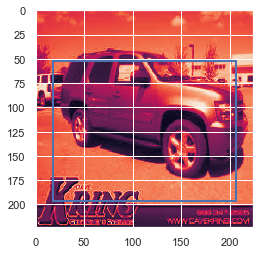

In [84]:
filename = './drive-download-20210512T142103Z-001/Car Images/Test Images/Chevrolet Tahoe Hybrid SUV 2012/03663.jpg'
drawPredictedBBOnImage(filename,(IMAGE_WIDTH,IMAGE_HEIGHT,CHANNEL),'image_array','grayscale')

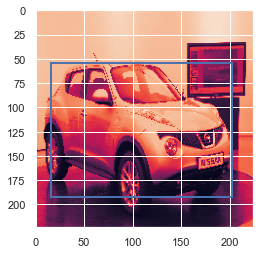

In [85]:
filename = './drive-download-20210512T142103Z-001/Car Images/Test Images/Nissan Juke Hatchback 2012/03917.jpg'
drawPredictedBBOnImage(filename,(IMAGE_WIDTH,IMAGE_HEIGHT,CHANNEL),'image_array','grayscale')

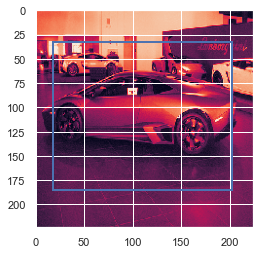

In [86]:
filename = './drive-download-20210512T142103Z-001/Car Images/Test Images/Lamborghini Reventon Coupe 2008/00645.jpg'
drawPredictedBBOnImage(filename,(IMAGE_WIDTH,IMAGE_HEIGHT,CHANNEL),'image_array','grayscale')